

# Project: Investigate a Dataset - [NO SHOW APPOINTMENT]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


In [2]:
# import packages to be used in the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
df=pd.read_csv('noshowappointments_2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning

In [4]:
#print the the number of observations and attributes of the dataset
df.shape

(110527, 14)

In [5]:
#displaying a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#brief summary of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### General description of the dataset

The description of the dataset shows that the mean age is 37, min is -1, and the maximum age is 115. The median age being 37 years.About 50% of the patients fall betwenn the ages of 18-55, The mean of those that suffer from Hipertension and Diabetes is 20% and 7% respectively. Majority of the population are not handicapped. only 19% of the patients being beneficiaries of scholarship.

In [14]:
#printing the row with min age of -1(will drop it later)
min_age = df.query('age=="-1"')
min_age

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [8]:
df.isnull().sum()#finding the number of missing values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
#finding the number of duplicates 
df.duplicated().sum()

0

In [10]:
sum(df.duplicated()) #finding the sum of duplicates

0

In [11]:
# getting no of unique values in the dataset
df.nunique()

PatientId           6100
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

From the information obtained above, the dataset contains (rows,columns) = (110527,14). Further, the dataset contains no missing values and no duplicates. In total the number of unique values are 220,407.


In [12]:
#renaming columns
df.rename(columns={'No-show':'no_show'}, inplace=True)
df.rename(columns=lambda x: x.strip().lower(),inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
#dropping of unused columns in the analysis
df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday'],axis=1,inplace=True)
df.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [15]:
df.drop(index=99832, inplace=True)

In [16]:
df.age.describe() #checking if -1 has been dropped

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

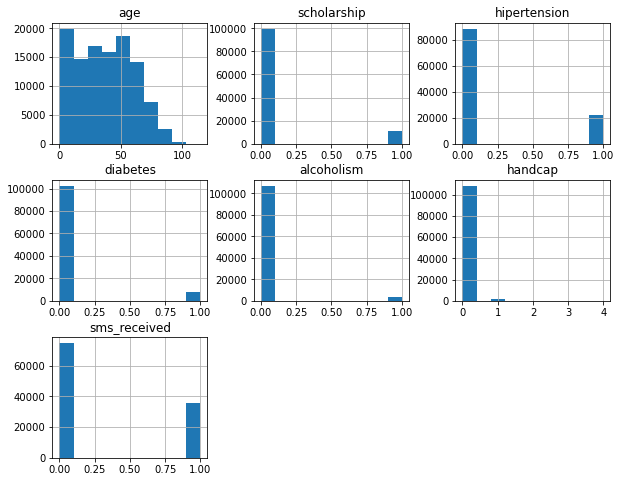

In [17]:
df.hist(figsize=(10,8)); #general display of variables distribution

### Research Question 1: Is there a a correlation/relationship between age and patients attendance


In [18]:
show=df.no_show=='No'
noshow=df.no_show=='Yes'
df[show].count(), df[noshow].count()

(gender           88207
 age              88207
 neighbourhood    88207
 scholarship      88207
 hipertension     88207
 diabetes         88207
 alcoholism       88207
 handcap          88207
 sms_received     88207
 no_show          88207
 dtype: int64,
 gender           22319
 age              22319
 neighbourhood    22319
 scholarship      22319
 hipertension     22319
 diabetes         22319
 alcoholism       22319
 handcap          22319
 sms_received     22319
 no_show          22319
 dtype: int64)

In [19]:
df.age[show].mean(), df.age[noshow].mean() # the mean age of showing and non showing patients

(37.790504154999034, 34.31766656212196)

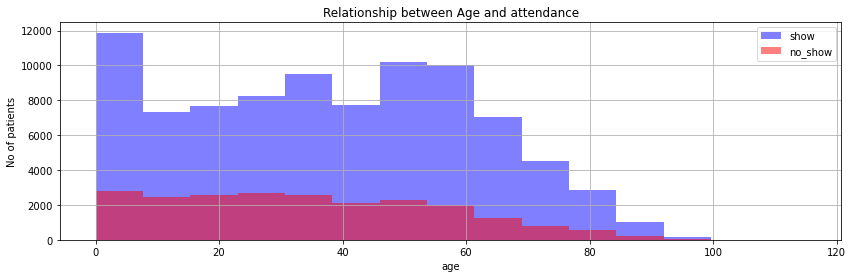

In [24]:
def showing(df, col_name, showed, absent): #defining the function
    plt.figure(figsize=(14,4))
    df[col_name][show].hist(alpha=.5,bins=15,color='blue')
    df[col_name][noshow].hist(alpha=.5,bins=15,color='red')
    plt.xlabel('age')
    plt.ylabel('No of patients')
    plt.title('Relationship between Age and attendance')
    plt.legend(["show", "no_show"]);

showing(df, 'age', show, noshow)

### Age Analysis
The mean age of showing patients is 38, and that of non showing patients is 34, With patients between the ages of 0-15, more likely to show up for their appointments(mostly because they are children being accompanied to the appointments by their parents). Patients above 60 years are more likely to not miss their appointments, probably because they are dependent on other people to take tem due to their old age. There is therefore a relationship between age and patients showing up for their appointment, though the correlation is not strong.

### Research Question 2: Is there a relationship between age and chronic diseases

In [25]:
df.hipertension[show].mean(), df.hipertension[show].mean() #checking the average attendance rate 

(0.20439420907637715, 0.20439420907637715)

In [26]:
df.diabetes[show].mean(), df.diabetes[show].mean() #mean of attendance of patients with diabetes

(0.07383767728184838, 0.07383767728184838)

In [27]:
#checking  mean age and chronic diseases and their effect together on attendance
df[show].groupby(['hipertension', 'diabetes']).mean()['age'], df[noshow].groupby(['hipertension', 'diabetes']).mean()['age']  

(hipertension  diabetes
 0             0           31.510433
               1           53.666952
 1             0           59.702144
               1           63.406361
 Name: age, dtype: float64,
 hipertension  diabetes
 0             0           28.834155
               1           49.183391
 1             0           58.377043
               1           62.820333
 Name: age, dtype: float64)

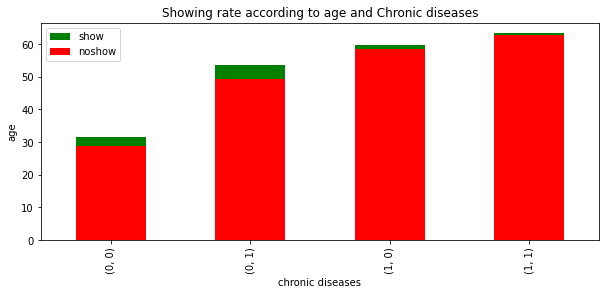

In [31]:
plt.figure(figsize=(10,4));
df[show].groupby(['hipertension', 'diabetes']).mean().age.plot(kind='bar',color='green');
df[noshow].groupby(['hipertension', 'diabetes']).mean().age.plot(kind='bar',color='red');
plt.xlabel('chronic diseases');
plt.ylabel('age');
plt.title("Showing rate according to age and Chronic diseases")
plt.legend(["show", "noshow"]);
plt.show();

### Relationship between age, chronic illneses and showing/nonshowing rate
The mean age of showing and non showing patients not suffering from both hypertension and diabetes is 32 and 29 respectively, while those who showed and didnt show and are suffering from the chronic diseases is 63 years.

### Relationship between age and chronic illnesses
From the analysis above, those suffering from chronic diseases are the patients 60 years and above). This proves a strong positive relationship between age and chronic illnesses.

### Research Question 3: Is there a relationship between gender and patient attendance

In [32]:
df.gender.unique()

array(['F', 'M'], dtype=object)

In [33]:
df.gender.unique() #checking if changes have been effected after converting gender to int

array(['F', 'M'], dtype=object)

In [34]:
df['gender'].replace({0:'F', 1:'M'}, inplace=True) # converting gender back to string for ease of analysis
df.gender.unique()

array(['F', 'M'], dtype=object)

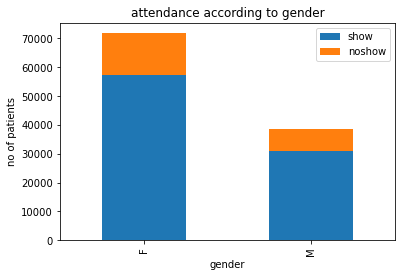

In [35]:
#displaying attendance according to gender
df.groupby("gender")["no_show"].value_counts().unstack().plot(kind="bar", stacked=True);
plt.ylabel("no of patients")
plt.xlabel("gender")
plt.title("attendance according to gender")
plt.legend(["show", "noshow"]);

### gender analysis:

From this analysis, the average male and female show or no show rate is almost the same. Gender has no relationship with/effect on patient attendance.

### Research Question 4: Is there a relationship between SMS received and attendance

In [36]:
df.sms_received.value_counts() #total sms count

0    75044
1    35482
Name: sms_received, dtype: int64

In [37]:
df.groupby("sms_received")["no_show"].value_counts() #attendance numbers according to receiving of sms

sms_received  no_show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: no_show, dtype: int64

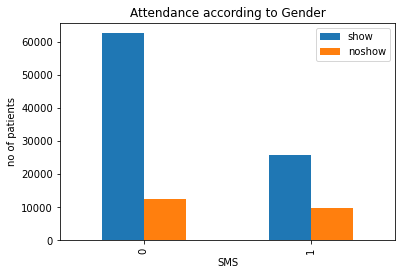

In [38]:
#displaying the numbers of attending patients based receiving or not receiving SMS

df.groupby("sms_received")["no_show"].value_counts().unstack().plot(kind='bar');#attendance according to sms_received
plt.xlabel("SMS")
plt.ylabel("no of patients")
plt.title("Attendance according to Gender")
plt.legend(['show', 'noshow']);

### SMS analysis:

A higher number of the patients did not receive Sms, but showed up to their appointments as opposed to those who received.Those who received an sms had a lower turn out. According to the analysis, receiving or not receiving sms doesn't influence patients to show up for appointments. Therefore no correlation

### Research Question 4: Is there a relationship between hospital neighbourhood and attendance?

In [39]:
df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [45]:
df.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


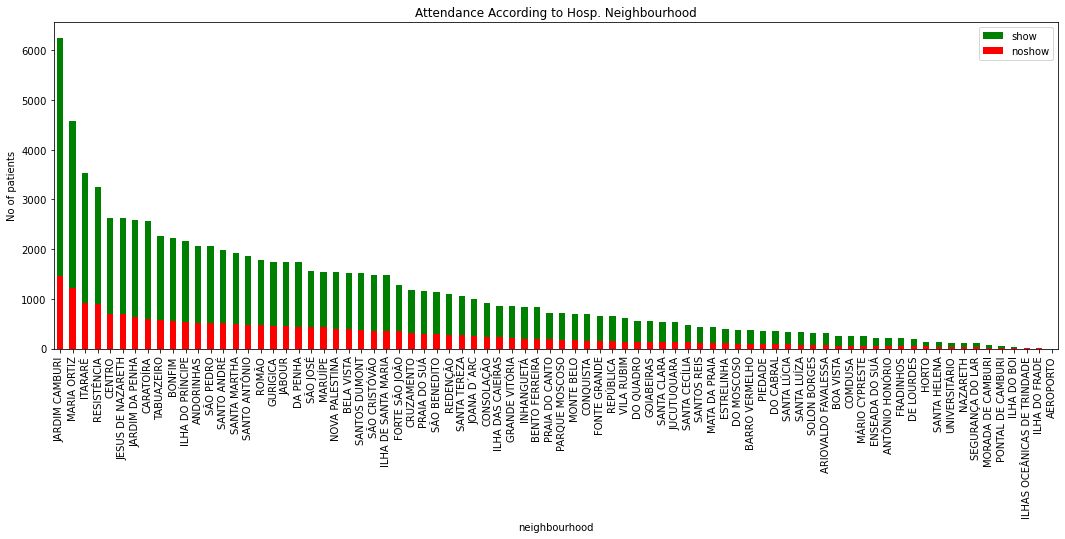

In [47]:
#displaying the no of patients attendance according to neighbourhood
def showing(df, col_name, showed, absent): #defining the function
    df[col_name][show].value_counts().plot(kind='bar',figsize=(18,6),color='green');
    df[col_name][noshow].value_counts().plot(kind='bar',figsize=(18,6),color='red');
    plt.xlabel("neighbourhood");
    plt.ylabel("No of patients");
    plt.title("Attendance According to Hosp. Neighbourhood");
    plt.legend(["show", "noshow"]);
showing(df,"neighbourhood", show, noshow)

In [48]:
df.groupby('neighbourhood')['no_show'].value_counts()

neighbourhood    no_show
AEROPORTO        No            7
                 Yes           1
ANDORINHAS       No         1741
                 Yes         521
ANTÔNIO HONÓRIO  No          221
                            ... 
TABUAZEIRO       Yes         573
UNIVERSITÁRIO    No          120
                 Yes          32
VILA RUBIM       No          710
                 Yes         141
Name: no_show, Length: 160, dtype: int64

According to the analysis done, it seems like hospital neighbourhood has a great effect on show rate, since some areas have a greater number of patient records as opposed to others, With JARDIM CAMBURI having the highest number of patients and also the greatest show up rate.

<a id='conclusions'></a>
## Conclusions
There is no strong relationship between age and patients showing up for their appointment, with younger patients likely to show up fro the appointment and older people likely to not miss their appoints. The middle aged betwn 30-55 are likely to miss their appointments

There is a strong positive relationship between age and chronic illnesses.
Patients suffering from chronic diseases are the patients 60 years and above. 

There is no relationship between patients showing up for appointments and them receiveing SMS. Patient receiving SMS does not increase the chances that he/she will show up for appointment

There is no relationship between gender and patients attendance, as there is no difference between showing and non showing gender statistics.



### Limitations
1. There was no clear explanation on how data was collected and the period of time it was collected. 
2. Some attributes such as the handcap column, and SMS received were not clearly explained on the description of the dataset.
3.There was explanation of the reasons on why patients had to visit the doctor, which would have provided extra details on why the patients missed their appoints.
4. Data was collected on a short period of times. this makes the data unreliable since one time records on patients attendance may not be enough to make a proper analysis

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1